 Load libraries and api key

In [2]:
import os
from dotenv import load_dotenv
from tqdm import tqdm

# Load API key from .env file in the root directory
load_dotenv()
API_KEY = os.environ.get('API_SIMFIN')

# 8) continue with the tutorial https://github.com/SimFin/simfin-tutorials/blob/master/01_Basics.ipynb

# matplotlib inline
import pandas as pd
import matplotlib

# Import the main functionality from the SimFin Python API.
import simfin as sf

# Import names used for easy access to SimFin's data-columns.
from simfin.names import *

# Set the directory where the data is downloaded
sf.set_data_dir('~/simfin_data/')

# Replace YOUR_API_KEY with your actual API-key.
sf.set_api_key(api_key=API_KEY)

Load and check data

In [3]:
df1 = sf.load(dataset='income', variant='ttm', market='us', refresh_days = 3)
print(df1.head())

Dataset "us-income-ttm" on disk (3 days old).
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!
  Ticker  SimFinId Currency  Fiscal Year Fiscal Period Report Date  \
0      A     45846      USD         2017            Q4  2017-10-31   
1      A     45846      USD         2018            Q1  2018-01-31   
2      A     45846      USD         2018            Q2  2018-04-30   
3      A     45846      USD         2018            Q3  2018-07-31   
4      A     45846      USD         2018            Q4  2018-10-31   

  Publish Date Restated Date  Shares (Basic)  Shares (Diluted)  ...  \
0   2017-12-21    2018-12-20     322000000.0       326000000.0  ...   
1   2018-03-06    2019-03-05     322250000.0       325250000.0  ...   
2   2018-05-31    2019-05-30     322500000.0       325500000.0  ...   
3   2018-08-30    2018-08-30     322250000.0       325000000.0  ...   
4   2018-12-20    2020-12-18     321000000.0       325000000.0  ...   

   Non-Operating In

/Users/gabrielepicheo/GitHub/.venv/lib/python3.11/site-packages/simfin/load.py:154: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(path, sep=';', header=0,


Overview of the subset of dataset

In [4]:
num_rows, num_columns = df1.shape
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")

# Display basic information about the DataFrame
print("DataFrame Info:")
print(df1.info())

Number of Rows: 58876
Number of Columns: 28
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58876 entries, 0 to 58875
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Ticker                                    58876 non-null  object 
 1   SimFinId                                  58876 non-null  int64  
 2   Currency                                  58876 non-null  object 
 3   Fiscal Year                               58876 non-null  int64  
 4   Fiscal Period                             58876 non-null  object 
 5   Report Date                               58876 non-null  object 
 6   Publish Date                              58876 non-null  object 
 7   Restated Date                             58876 non-null  object 
 8   Shares (Basic)                            58596 non-null  float64
 9   Shares (Diluted)                          585

In [5]:
# Display the first few rows of the DataFrame
print("\nDataFrame Head:")
print(df1.head())



DataFrame Head:
  Ticker  SimFinId Currency  Fiscal Year Fiscal Period Report Date  \
0      A     45846      USD         2017            Q4  2017-10-31   
1      A     45846      USD         2018            Q1  2018-01-31   
2      A     45846      USD         2018            Q2  2018-04-30   
3      A     45846      USD         2018            Q3  2018-07-31   
4      A     45846      USD         2018            Q4  2018-10-31   

  Publish Date Restated Date  Shares (Basic)  Shares (Diluted)  ...  \
0   2017-12-21    2018-12-20     322000000.0       326000000.0  ...   
1   2018-03-06    2019-03-05     322250000.0       325250000.0  ...   
2   2018-05-31    2019-05-30     322500000.0       325500000.0  ...   
3   2018-08-30    2018-08-30     322250000.0       325000000.0  ...   
4   2018-12-20    2020-12-18     321000000.0       325000000.0  ...   

   Non-Operating Income (Loss)  Interest Expense, Net  \
0                  -38000000.0            -57000000.0   
1                  -2

Visualize colums

In [6]:
print(df1.columns)
selected_columns = ['Ticker','Fiscal Year','Fiscal Period','Operating Income (Loss)']

Index(['Ticker', 'SimFinId', 'Currency', 'Fiscal Year', 'Fiscal Period',
       'Report Date', 'Publish Date', 'Restated Date', 'Shares (Basic)',
       'Shares (Diluted)', 'Revenue', 'Cost of Revenue', 'Gross Profit',
       'Operating Expenses', 'Selling, General & Administrative',
       'Research & Development', 'Depreciation & Amortization',
       'Operating Income (Loss)', 'Non-Operating Income (Loss)',
       'Interest Expense, Net', 'Pretax Income (Loss), Adj.',
       'Abnormal Gains (Losses)', 'Pretax Income (Loss)',
       'Income Tax (Expense) Benefit, Net',
       'Income (Loss) from Continuing Operations',
       'Net Extraordinary Gains (Losses)', 'Net Income',
       'Net Income (Common)'],
      dtype='object')


In [7]:
df1[selected_columns]

,Ticker,Fiscal Year,Fiscal Period,Operating Income (Loss)
0,A,2017,Q4,841000000
1,A,2018,Q1,864000000
2,A,2018,Q2,873000000
3,A,2018,Q3,897000000
4,A,2018,Q4,889000000
...,...,...,...,...
58871,ZYXI,2021,Q2,6440000
58872,ZYXI,2021,Q3,13077000
58873,ZYXI,2021,Q4,22366000
58874,ZYXI,2022,Q1,25353000


Indexing dataframe

In [8]:
df2 = sf.load(dataset='income', variant='annual', market='us',
              index=[TICKER, REPORT_DATE],
              parse_dates=[REPORT_DATE, PUBLISH_DATE, RESTATED_DATE])

Dataset "us-income-annual" on disk (3 days old).
- Loading from disk ... Done!


/Users/gabrielepicheo/GitHub/.venv/lib/python3.11/site-packages/simfin/load.py:154: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(path, sep=';', header=0,


In [9]:
print(df2.head())

                    SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2017-10-31      45846      USD         2017            FY   2017-12-21   
       2018-10-31      45846      USD         2018            FY   2018-12-20   
       2019-10-31      45846      USD         2019            FY   2019-12-19   
       2020-10-31      45846      USD         2020            FY   2020-12-18   
       2021-10-31      45846      USD         2021            FY   2021-12-17   

                   Restated Date  Shares (Basic)  Shares (Diluted)  \
Ticker Report Date                                                   
A      2017-10-31     2018-12-20     322000000.0       326000000.0   
       2018-10-31     2020-12-18     321000000.0       325000000.0   
       2019-10-31     2021-12-17     314000000.0       318000000.0   
       2020-10-31     2022-12-21     309000000.0       312000000.0   
       2021-

Lookup ticker and extract columns

In [10]:
df2.loc['MSFT']

,SimFinId,Currency,Fiscal Year,Fiscal Period,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,...,Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common)
Report Date,,,,,,,,,,,,,,,,,,,,,
2018-06-30,59265,USD,2018,FY,2018-08-03,2020-07-30,7.700000e+09,7.794000e+09,1.103600e+11,-3.835300e+10,...,1.416000e+09,NaN,36474000000,NaN,36474000000,-1.990300e+10,16571000000,NaN,16571000000,16571000000
2019-06-30,59265,USD,2019,FY,2019-08-01,2021-07-29,7.673000e+09,7.753000e+09,1.258430e+11,-4.291000e+10,...,7.290000e+08,NaN,43688000000,NaN,43688000000,-4.448000e+09,39240000000,NaN,39240000000,39240000000
2020-06-30,59265,USD,2020,FY,2020-07-30,2022-07-28,7.610000e+09,7.683000e+09,1.430150e+11,-4.607800e+10,...,7.700000e+07,NaN,53036000000,NaN,53036000000,-8.755000e+09,44281000000,NaN,44281000000,44281000000
2021-06-30,59265,USD,2021,FY,2021-07-29,2023-07-27,7.554000e+09,7.617000e+09,1.680880e+11,-5.223200e+10,...,1.186000e+09,NaN,71102000000,NaN,71102000000,-9.831000e+09,61271000000,NaN,61271000000,61271000000
2022-06-30,59265,USD,2022,FY,2022-07-28,2023-07-27,7.496000e+09,7.540000e+09,1.982700e+11,-6.265000e+10,...,3.330000e+08,NaN,83716000000,NaN,83716000000,-1.097800e+10,72738000000,NaN,72738000000,72738000000


In [11]:
df2.loc['MSFT'][OPERATING_INCOME]
selected_columns2 = ['Fiscal Year','Fiscal Period','Operating Income (Loss)']
df2.loc['MSFT'][selected_columns2]

,Fiscal Year,Fiscal Period,Operating Income (Loss)
Report Date,,,
2018-06-30,2018,FY,35058000000
2019-06-30,2019,FY,42959000000
2020-06-30,2020,FY,52959000000
2021-06-30,2021,FY,69916000000
2022-06-30,2022,FY,83383000000


Plot

<Axes: xlabel='Report Date'>

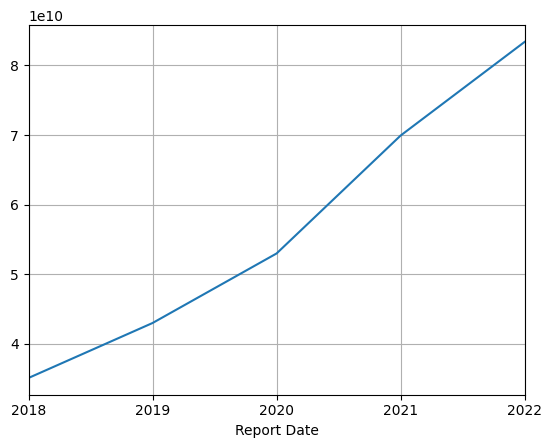

In [12]:
df2.loc['MSFT'][OPERATING_INCOME].plot(grid = True)

Load (special functions) all financial statments

In [15]:
df_income = sf.load_income(variant='ttm', market='us')
print(df_income.head())

Dataset "us-income-ttm" on disk (0 days old).
- Loading from disk ... 

/Users/gabrielepicheo/GitHub/.venv/lib/python3.11/site-packages/simfin/load.py:154: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(path, sep=';', header=0,


Done!
                    SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2017-10-31      45846      USD         2017            Q4   2017-12-21   
       2018-01-31      45846      USD         2018            Q1   2018-03-06   
       2018-04-30      45846      USD         2018            Q2   2018-05-31   
       2018-07-31      45846      USD         2018            Q3   2018-08-30   
       2018-10-31      45846      USD         2018            Q4   2018-12-20   

                   Restated Date  Shares (Basic)  Shares (Diluted)  \
Ticker Report Date                                                   
A      2017-10-31     2018-12-20     322000000.0       326000000.0   
       2018-01-31     2019-03-05     322250000.0       325250000.0   
       2018-04-30     2019-05-30     322500000.0       325500000.0   
       2018-07-31     2018-08-30     322250000.0       325000000.0   
      

In [21]:
df_balance = sf.load_balance(variant='ttm', market='us')
print(df_balance.columns)
print(df_balance.head())

Dataset "us-balance-ttm" on disk (0 days old).
- Loading from disk ... 

/Users/gabrielepicheo/GitHub/.venv/lib/python3.11/site-packages/simfin/load.py:154: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(path, sep=';', header=0,


Done!
Index(['SimFinId', 'Currency', 'Fiscal Year', 'Fiscal Period', 'Publish Date',
       'Restated Date', 'Shares (Basic)', 'Shares (Diluted)',
       'Cash, Cash Equivalents & Short Term Investments',
       'Accounts & Notes Receivable', 'Inventories', 'Total Current Assets',
       'Property, Plant & Equipment, Net',
       'Long Term Investments & Receivables', 'Other Long Term Assets',
       'Total Noncurrent Assets', 'Total Assets', 'Payables & Accruals',
       'Short Term Debt', 'Total Current Liabilities', 'Long Term Debt',
       'Total Noncurrent Liabilities', 'Total Liabilities',
       'Share Capital & Additional Paid-In Capital', 'Treasury Stock',
       'Retained Earnings', 'Total Equity', 'Total Liabilities & Equity'],
      dtype='object')
                    SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2017-10-31      45846      USD         2017            Q4   

In [23]:
df_cashflow = sf.load_cashflow(variant='ttm', market='us')
print(df_cashflow.columns)
print(df_cashflow.head())

Dataset "us-cashflow-ttm" on disk (0 days old).
- Loading from disk ... 

/Users/gabrielepicheo/GitHub/.venv/lib/python3.11/site-packages/simfin/load.py:154: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(path, sep=';', header=0,


Done!
Index(['SimFinId', 'Currency', 'Fiscal Year', 'Fiscal Period', 'Publish Date',
       'Restated Date', 'Shares (Basic)', 'Shares (Diluted)',
       'Net Income/Starting Line', 'Depreciation & Amortization',
       'Non-Cash Items', 'Change in Working Capital',
       'Change in Accounts Receivable', 'Change in Inventories',
       'Change in Accounts Payable', 'Change in Other',
       'Net Cash from Operating Activities',
       'Change in Fixed Assets & Intangibles',
       'Net Change in Long Term Investment',
       'Net Cash from Acquisitions & Divestitures',
       'Net Cash from Investing Activities', 'Dividends Paid',
       'Cash from (Repayment of) Debt', 'Cash from (Repurchase of) Equity',
       'Net Cash from Financing Activities', 'Net Change in Cash'],
      dtype='object')
                    SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2017-10-31      45846    